In [91]:
using Zygote
using StaticArrays
using Plots

In [92]:
function newtn(params_shape,no_of_pts,params_val_y_meas,loop,error,thresh,losses)
    vars=rand(params_shape) #randomly initialize the parameters(decision variables) to optimize
    vars_init=copy(vars) #saving the initialzed params for future use/record
    while error>=thresh # until the error is less than or equal to a particular threshold, run the loop
        F=f(vars) # the value of y_meas-y_func at corresponding point of time/data point
        J=∇f(vars) # Calculate Jacobian of r (y_measured-y_func for every x)
        r=F
        d_=*(*(inv(*(J',J)),J'),r) # ignored S(x) as given in book its components are negligebly small
        vars=vars.-d_ #updated parameters values after a iteration
        #loss_rn=sum(r.^2)
        loss_rn=*(r',r) # calculating the squared loss of r (objective function)
        push!(losses,loss_rn) # adding loss of current epoch/loop to losses list
        if loop>=1
                error=abs(last(losses))
        end
        loop+=1
        println(loop,":",abs(last(losses)))
    end
    return vars,vars_init,y_meas,losses,x1,params_val_y_meas,loop;
end
    
    
function draw_plots(x1,y_meas)
    plot(x1,[y_meas];  # Plot of y_measured
    label=["Original(Measured)"],linewidth=15) # 
    plot!(x1,[y_meas]; # Plot with optimized parameter of our function by Newton Method 
    label=["Gauss-Newton Curve"],linewidth=2,ls=:dot);
    plot!(legend=:outerbottom, legendcolumns=3)
    title!("Y_Meas vs Y_Func Newton Method")
    xlabel!("Data Points(x)")
    ylabel!("Function Value(y)")
end

draw_plots (generic function with 1 method)

The steps to run the code:

1. Change the formula in function **y_m** accordingly.

2. Define the number of data points (**no_of_pts**)

3. Define the parameters of y_meas (**params_val_y_meas**)

4. Define the points (**x1**)

5. Create **y_meas**

6. Initialize Jacobian and static array vectors

7. Run the function **newtn** with following parameters:

  **params_shape** - no. of parameters in the function to optimize
  
  **no_of_pts**
  
  **params_val_y_meas**
  
  **loop-** to record the number of epochs/loops till convergence
  
  **error-** this variable records the error/loss in current epoch, it needs to be initialized
  
  **thresh-** minimum error value below which the function terminates; needs to be initialized
  
  **losses-** list to record the errors/loss per epoch/loop/iteration
  
  8. Run the function **draw_plots** with parameters:
  
  **x1-** the datapoints,
  **y_meas-** values of y_measured
  
  9. Plot the loss curve and print the final value of optimized parameters.

**The first function:**

In [93]:
function y_m(params,x) # create the y_measured (the given measurements)
        y_meas=params[1] * sin.(params[2] * x .+ params[3])
        return y_meas
end

no_of_pts=20
params_val_y_meas=[20.0,10.0,1.0] #A,w,theta
x1=range(0,stop=10,length=no_of_pts)

#y_meas=params_val_y_meas[1] .* sin.(params_val_y_meas[2] * x1 .+ params_val_y_meas[3])
y_meas=y_m(params_val_y_meas,x1);
f(A,w,theta) = (y_meas).-(A.*sin.(w.*x1.+theta))
f(x) = f(x[1],x[2],x[3])
∇f(x) =Zygote.jacobian( f , x )[1]
∇f(A,w,theta) = ∇f(StaticArrays.SVector(A,w,theta))

vars,vars_init,y_meas,losses,x1,params_val_y_meas,loop=newtn(3,no_of_pts,params_val_y_meas,0,500.0,10.0,[1000.0])

1:3959.4862662714636
2:4052.2247843506602
3:3476.924681267536
4:5927.100029369403
5:3961.2261754533424
6:3962.428005324297
7:4023.8741716507857
8:3968.2495830060275
9:4002.1292798804343
10:3998.2226221921233
11:3968.129349288572
12:3963.7889643466333
13:3985.7114091449953
14:3981.8378878529097
15:3968.6817452445475
16:3995.1995995714037
17:3966.4522781000765
18:4033.2502713434806
19:4005.892814949363
20:4006.9117074090273
21:4013.6747449927884
22:3984.668613688701
23:3982.633845882807
24:3963.8333357186493
25:3959.6001492388777
26:3961.8730894982646
27:3987.397271747442
28:3994.6775663561575
29:3966.4511193001044
30:4041.5999427788656
31:3965.1163177521407
32:4007.371934501854
33:3925.7260158543145
34:2761.0893387163574
35:1232.468329430519
36:439.68595308292873
37:11.857116193349233
38:0.007768112389699093


([19.999982390119253, 1.93805196511729, 64.9734463218898], [0.9633991401423798, 0.7021957976602101, 0.2090846081474267], [16.82941969615793, -0.40052147292507845, -17.24863958829731, -17.6533740521961, -1.2288855042015925, 16.367117800413588, 18.360105233350474, 2.850132349449493, -15.376913926794293, -18.944920353569966, -4.452453545591672, 14.284603188782869, 19.40393608239834, 6.025209246826693, -13.097438824898182, -19.734104431337972, -7.557955930229678, 11.823303927371738, 19.93323299331738, 9.040515743567012], [1000.0, 3959.4862662714636, 4052.2247843506602, 3476.924681267536, 5927.100029369403, 3961.2261754533424, 3962.428005324297, 4023.8741716507857, 3968.2495830060275, 4002.1292798804343  …  3966.4511193001044, 4041.5999427788656, 3965.1163177521407, 4007.371934501854, 3925.7260158543145, 2761.0893387163574, 1232.468329430519, 439.68595308292873, 11.857116193349233, 0.007768112389699093], 0.0:0.5263157894736842:10.0, [20.0, 10.0, 1.0], 38)

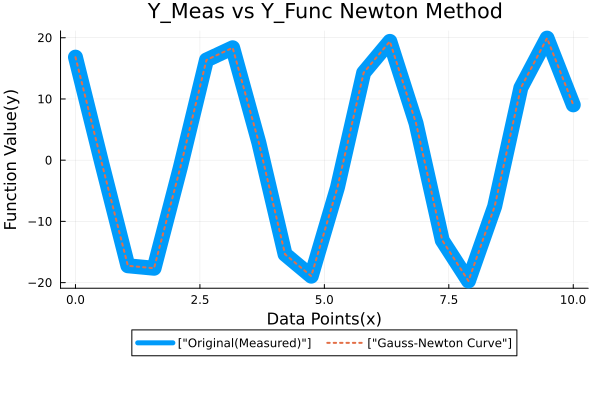

┌ Warning: n° of legend_column=3 is larger than n° of series=2
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends/gr.jl:1235
┌ Warning: n° of legend_column=3 is larger than n° of series=2
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends/gr.jl:1235
┌ Warning: n° of legend_column=3 is larger than n° of series=2
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends/gr.jl:1235


In [94]:
draw_plots(x1,y_meas)

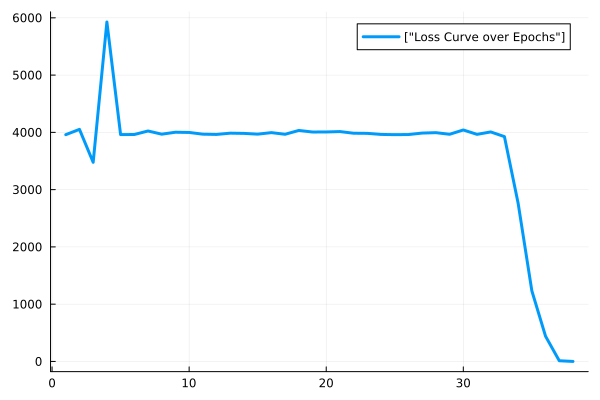

In [95]:
x=1:1:loop
losses=losses[2:end]
plot(x,losses,label=["Loss Curve over Epochs"],linewidth=3)

In [96]:
println("Initial parameter values:",vars_init) #A,w,theta
println("Final parameter values:",vars) #A,w,theta
println("Y measured parameter values:",params_val_y_meas) #A,w,theta

Initial parameter values:[0.9633991401423798, 0.7021957976602101, 0.2090846081474267]
Final parameter values:[19.999982390119253, 1.93805196511729, 64.9734463218898]
Y measured parameter values:[20.0, 10.0, 1.0]


**The 2nd Function:**

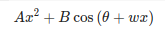

In [97]:
function y_m(params,x) # create the y_measured (the given measurements)
        y_meas=(params[1]*(x.^2)) + (params[2].*(cos.(params[3].*x.+params[4]))) 
        return y_meas
end

no_of_pts=20
params_val_y_meas=[20.0,20.0,1.0,1.0] #A,B,w,theta
x1=range(0,stop=10,length=no_of_pts)
y_meas=y_m(params_val_y_meas,x1);

f(A,B,w,theta) = (y_meas).- ( (A*(x1.^2)) + (B.*(cos.(w.*x1.+theta))) )
f(x) = f(x[1],x[2],x[3],x[4])


∇f(x) =Zygote.jacobian( f , x )[1]
∇f(AB,w,theta) = ∇f(StaticArrays.SVector(A,B,w,theta))

vars,vars_init,y_meas,losses,x1,params_val_y_meas,loop=newtn(4,no_of_pts,params_val_y_meas,0,500.0,10.0,[1000.0])

1:1.6371365699641708e7
2:193518.90919494393
3:3399.0821171096645
4:3423.3498325074097
5:3406.3649335325867
6:3405.947883260252
7:3447.680138057553
8:5738.471171453746
9:3405.5736022241335
10:3422.1147285054194
11:3411.5989546264655
12:3385.6361124126965
13:3455.0226281142577
14:3419.6107493531144
15:3435.8842479906452
16:3112.079190134096
17:12175.088617119132
18:3792.2637560334315
19:2875.8722761477848
20:148.91646819899017
21:1.0370038649968518


([20.00000014222154, -19.999990282529062, -24.876108593639756, 71.25664534765836], [0.4410736889723683, 0.6195921904358646, 0.10431435667200151, 0.12002964588926912], [10.806046117362795, 6.429483628586951, 12.892539693979012, 32.94455565818271, 68.65585615078584, 120.85736894405677, 188.91571557565152, 270.9046495413314, 364.12643843699686, 465.84206619209226, 574.0126096601876, 687.8511192402732, 808.0356245682676, 936.5256104752285, 1076.0316381411096, 1229.2816704632892, 1398.2826872570695, 1583.7774508187442, 1785.0434605265743, 2000.088513959761], [1000.0, 1.6371365699641708e7, 193518.90919494393, 3399.0821171096645, 3423.3498325074097, 3406.3649335325867, 3405.947883260252, 3447.680138057553, 5738.471171453746, 3405.5736022241335  …  3385.6361124126965, 3455.0226281142577, 3419.6107493531144, 3435.8842479906452, 3112.079190134096, 12175.088617119132, 3792.2637560334315, 2875.8722761477848, 148.91646819899017, 1.0370038649968518], 0.0:0.5263157894736842:10.0, [20.0, 20.0, 1.0, 1.

┌ Warning: n° of legend_column=3 is larger than n° of series=2
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends/gr.jl:1235
┌ Warning: n° of legend_column=3 is larger than n° of series=2
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends/gr.jl:1235


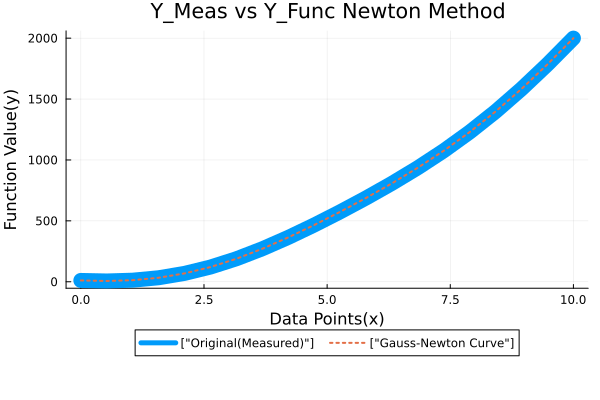

┌ Warning: n° of legend_column=3 is larger than n° of series=2
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends/gr.jl:1235


In [98]:
draw_plots(x1,y_meas)

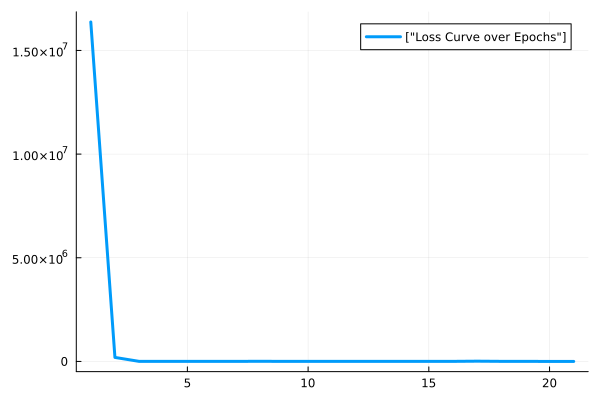

In [99]:
x=1:1:loop
losses=losses[2:end]
plot(x,losses,label=["Loss Curve over Epochs"],linewidth=3)

In [100]:
println("Initial parameter values:",vars_init)  #A,B,w,theta
println("Final parameter values:",vars)  #A,B,w,theta
println("Y measured parameter values:",params_val_y_meas)  #A,B,w,theta

Initial parameter values:[0.4410736889723683, 0.6195921904358646, 0.10431435667200151, 0.12002964588926912]
Final parameter values:[20.00000014222154, -19.999990282529062, -24.876108593639756, 71.25664534765836]
Y measured parameter values:[20.0, 20.0, 1.0, 1.0]
